In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
import os
from module import Model_Training
import logging
tf.get_logger().setLevel(logging.ERROR)
Model_Training = Model_Training()


2023-04-06 23:12:17.911945: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 23:12:18.287497: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-06 23:12:19.462703: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/include:/usr/local/cuda/lib64:/usr/local/cuda-11.2/lib64::/usr/local/cuda/extras/C

In [2]:
# full_img_path = '/mnt/d/Datasets/CBIS_DDSM/full/'
roi_img_path = '/mnt/d/CBIS-DDSM/new_ROI/ROI_CLAHE_train_val_split/'
img_height = 224
img_width = 224
batch_size = 4
os.environ['TF_ENABLE_GPU_GARBAGE_COLLECTION'] = 'false'
misclassified_store = '/mnt/c/Users/user/Desktop/CBIS_DDSM_misclassified/'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
test = tf.keras.utils.image_dataset_from_directory(
  roi_img_path+'test/',
  label_mode="categorical",
  image_size=(img_height, img_width),
  seed = 48,
  shuffle=None,
  batch_size=batch_size)

Found 308 files belonging to 2 classes.


# Inception V3

In [12]:
train_log = '/home/jj/FYP/log/InceptionV3_CBIS_DDSM/'
weights = '/home/jj/FYP/Checkpoint/InceptionV3_CBIS_DDSM/'

## Dense Training Result

77/77 [==============================] - 2s 17ms/step


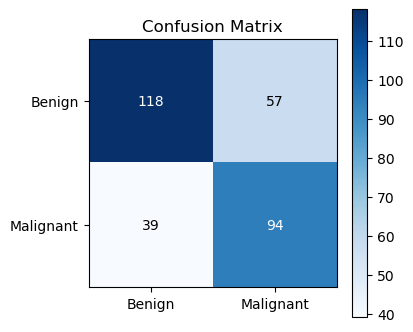

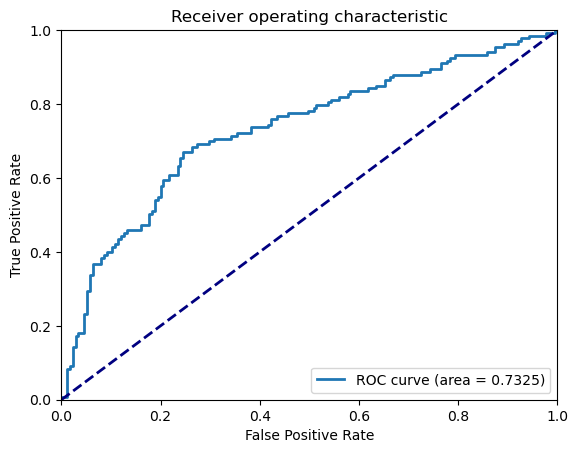

In [13]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('inceptionv3',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Dense/best_model',metrics=metric,img_height=img_height,img_width=img_width,training=False)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
model.save("/home/jj/FYP/Saved_Model/InceptionV3_CBISDDSM_DenseLayerTraining")

## Fine Tune

77/77 [==============================] - 2s 16ms/step


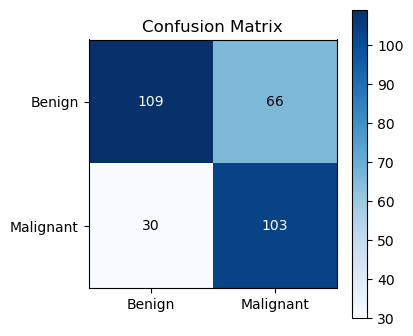

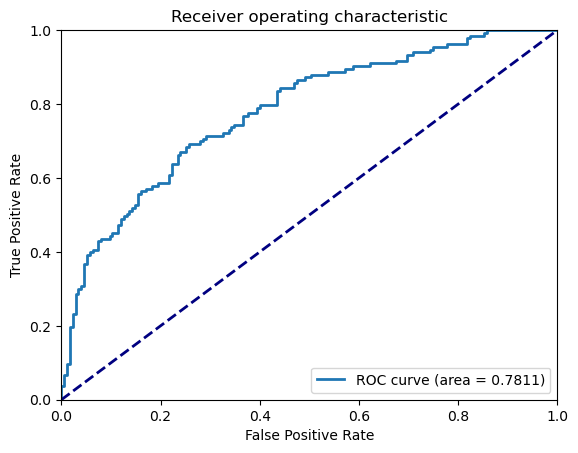

In [14]:
tf.keras.backend.clear_session()
# model.evaluate(test)
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('inceptionv3',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Fine_Tune/best_model',metrics=metric,img_height=img_height,img_width=img_width,training=False)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
model.save("/home/jj/FYP/Saved_Model/InceptionV3_CBISDDSM_2FT")

## FT 2

77/77 [==============================] - 2s 16ms/step


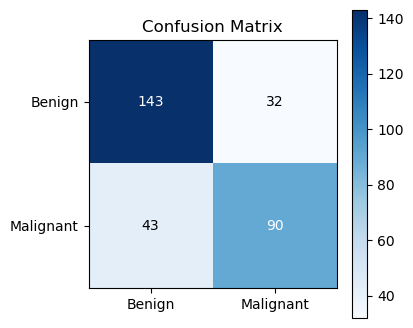

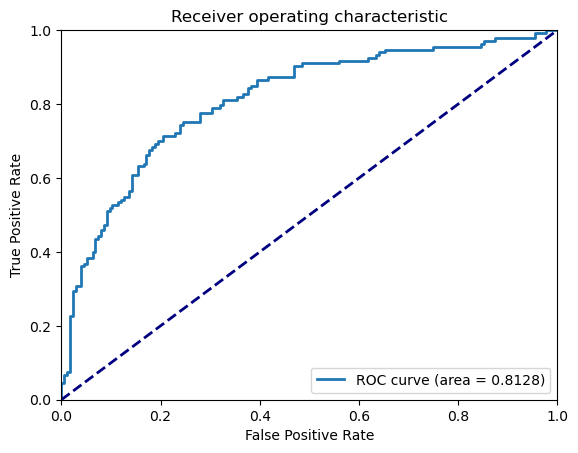

In [15]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=0),
          tf.keras.metrics.AUC()]

# model = Model_Training.build_model('inceptionv3',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Fine_Tune_2/best_model',metrics=metric)
model = Model_Training.build_model('inceptionv3',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Final_2/Final_2',metrics=metric,
                                   img_height=img_height,img_width=img_width,training=False)
# model.load_weights(weights+'/Fine_Tune/best_model')
model.evaluate(test)

prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
model.save("/home/jj/FYP/Saved_Model/InceptionV3_CBISDDSM_FullFT")

In [16]:
misclassified = Model_Training.store_misclassified(model,test,'/mnt/c/Users/user/Desktop/CBIS_DDSM_INCEPTION_misclassified/')

77/77 [==============================] - 1s 17ms/step


# Resnet50

In [17]:
weights = '/home/jj/FYP/Checkpoint/Resnet50_CBIS_DDSM/'
train_log = '/home/jj/FYP/log/Resnet50_CBIS_DDSM/'

77/77 [==============================] - 1s 13ms/step


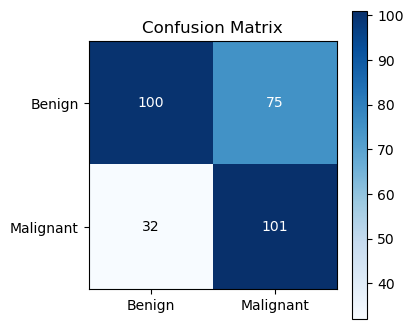

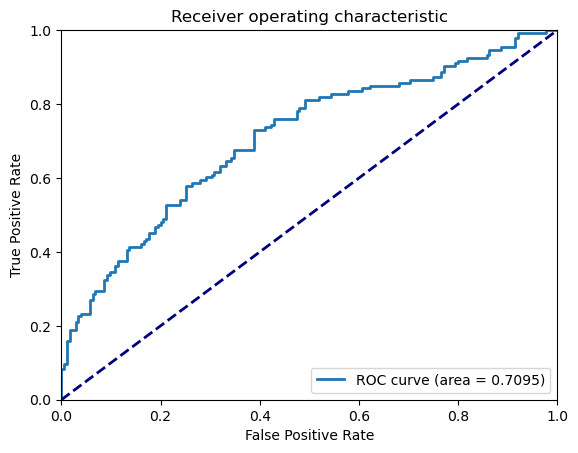

In [18]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('resnet50',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Dense/best_model',metrics=metric,img_height=img_height,img_width=img_width,training=False)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
model.save("/home/jj/FYP/Saved_Model/ResNet50_CBISDDSM_DenseLayerTraining")

## Fine Tune

77/77 [==============================] - 1s 13ms/step


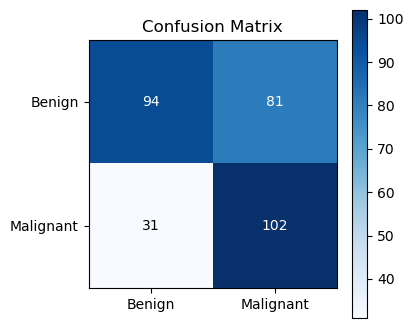

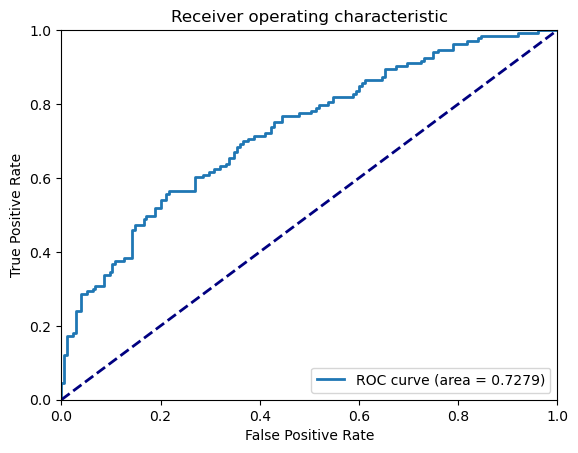

In [19]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('resnet50',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Fine_Tune/best_model',metrics=metric,img_height=img_height,img_width=img_width)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
model.save("/home/jj/FYP/Saved_Model/ResNet50_CBISDDSM_2FT")

## FT2

77/77 [==============================] - 1s 12ms/step


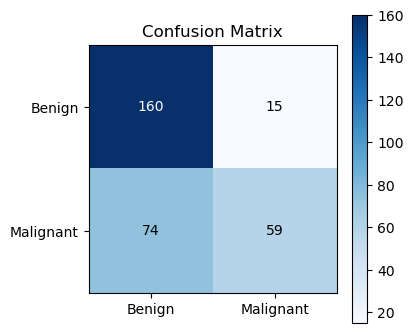

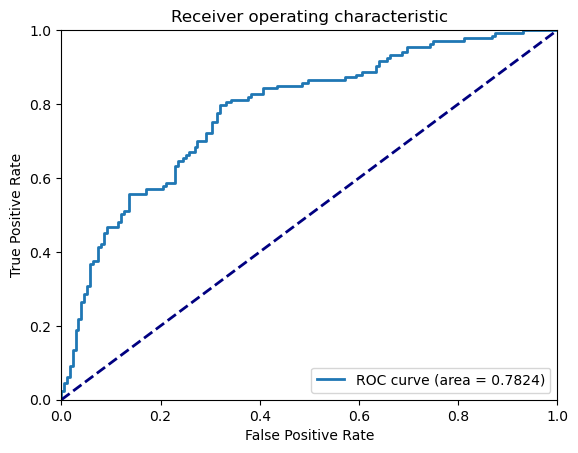

In [20]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('resnet50',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Final_2/Final_2',metrics=metric,img_height=img_height,img_width=img_width,training=False)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
model.save("/home/jj/FYP/Saved_Model/ResNet50_CBISDDSM_FullFT")
tf.keras.backend.clear_session()

# VGG16

In [21]:
weights = '/home/jj/FYP/Checkpoint/Vgg16_CBIS_DDSM/'
train_log = '/home/jj/FYP/log/Vgg16_CBIS_DDSM/'

77/77 [==============================] - 1s 11ms/step


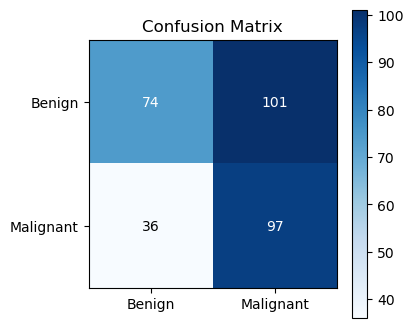

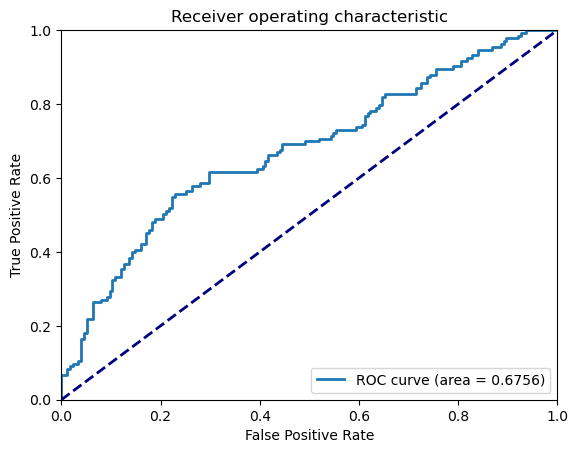

In [22]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('vgg16',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Dense/best_model',metrics=metric,img_height=img_height,img_width=img_width,training=False)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
model.save("/home/jj/FYP/Saved_Model/VGG16_CBISDDSM_DenseLayerTraining")

## Fine Tune

77/77 [==============================] - 1s 10ms/step


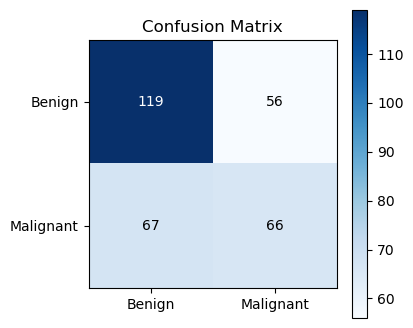

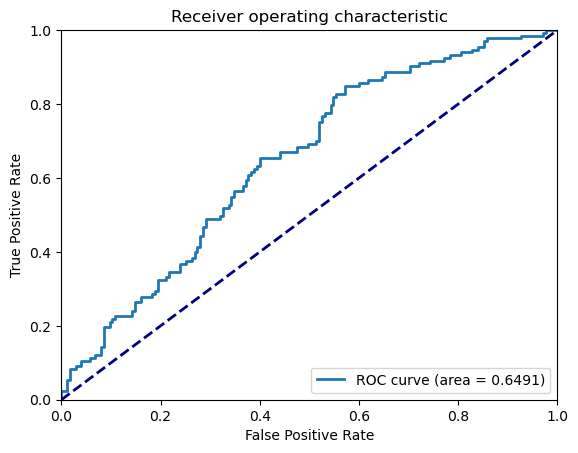

In [23]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('vgg16',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Fine_Tune/best_model',metrics=metric,img_width=img_width,img_height=img_height)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
model.save("/home/jj/FYP/Saved_Model/VGG16_CBISDDSM_2FT")

## FT2


77/77 [==============================] - 1s 10ms/step


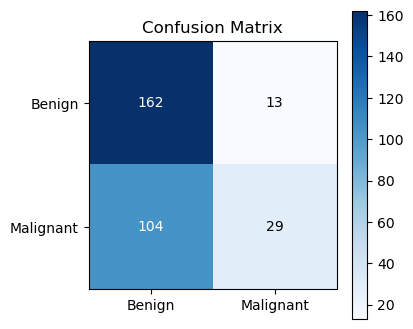

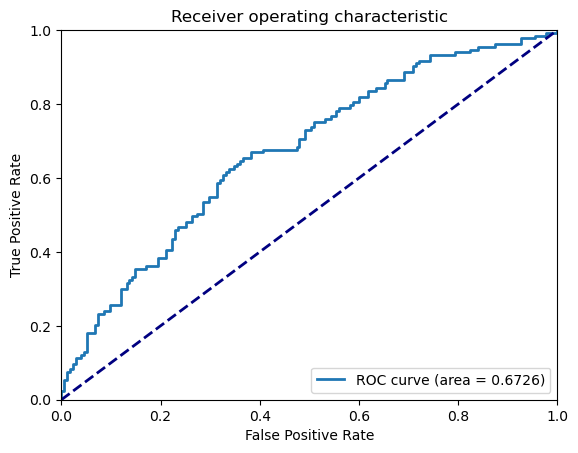

In [24]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]

model = Model_Training.build_model('vgg16',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Final_2/Final_2',metrics=metric,img_width=img_width,img_height=img_height,training=False)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
model.save("/home/jj/FYP/Saved_Model/VGG16_CBISDDSM_FullFT")
tf.keras.backend.clear_session()

# EfficientNet

In [25]:
weights = '/home/jj/FYP/Checkpoint/EffcientNetB3_CBIS_DDSM/'
train_log = '/home/jj/FYP/log/EffcientNetB3_CBIS_DDSM/'

77/77 [==============================] - 2s 16ms/step


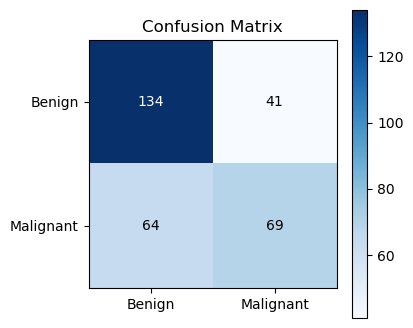

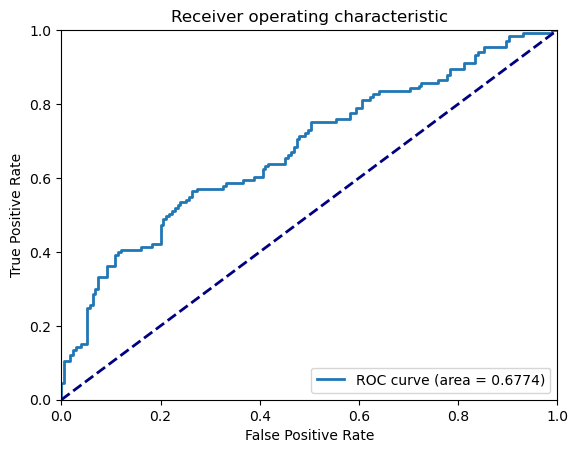

In [26]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('efficientnetb3',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Dense/best_model',metrics=metric,img_height=img_height,img_width=img_width,training=False)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
model.save("/home/jj/FYP/Saved_Model/EfficientNetB3_CBISDDSM_DenseLayerTraining")

## Fine Tune

2023-04-06 17:27:54.180068: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


77/77 [==============================] - 3s 20ms/step - loss: 0.5683 - categorical_accuracy: 0.7403 - precision: 0.7345 - recall: 0.6241 - auc: 0.7823


2023-04-06 17:27:57.052764: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetb3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


77/77 [==============================] - 2s 14ms/step


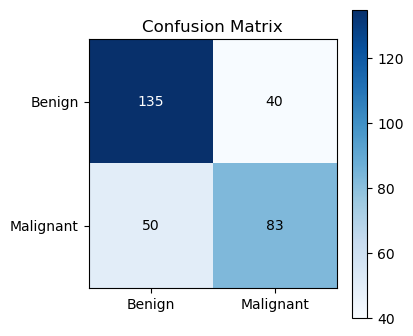

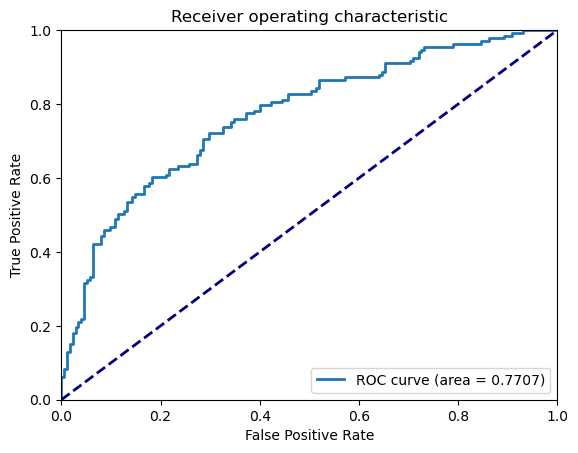

In [27]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('efficientnetb3',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Fine_Tune/best_model',metrics=metric,img_width=img_width,img_height=img_height)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
model.save("/home/jj/FYP/Saved_Model/EfficientNetB3_2FT")

## FT2

77/77 [==============================] - 2s 16ms/step


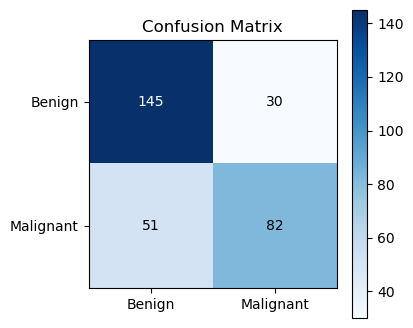

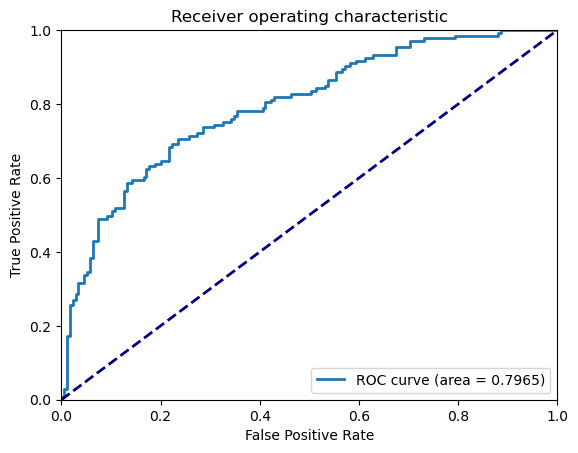

In [28]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('efficientnetb3',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Final_2/Final_2',metrics=metric,img_width=img_width,img_height=img_height,training=False)
# model.load_weights(weights+'Fine_Tune/best_model')
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
model.save("/home/jj/FYP/Saved_Model/EfficientNetB3_FullFT")
tf.keras.backend.clear_session()

# ConvNext

In [29]:
weights = '/home/jj/FYP/Checkpoint/Convnext_CBIS_DDSM/'
train_log = '/home/jj/FYP/log/Convnext_CBIS_DDSM/'

2023-04-06 17:28:17.710493: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1fe5d9f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-06 17:28:17.710525: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2023-04-06 17:28:18.395397: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


77/77 [==============================] - 8s 75ms/step


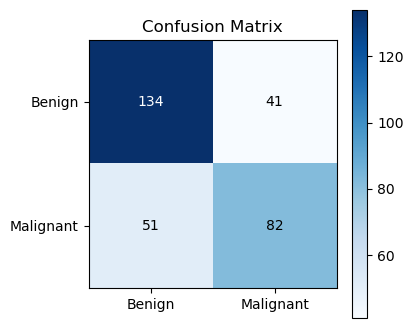

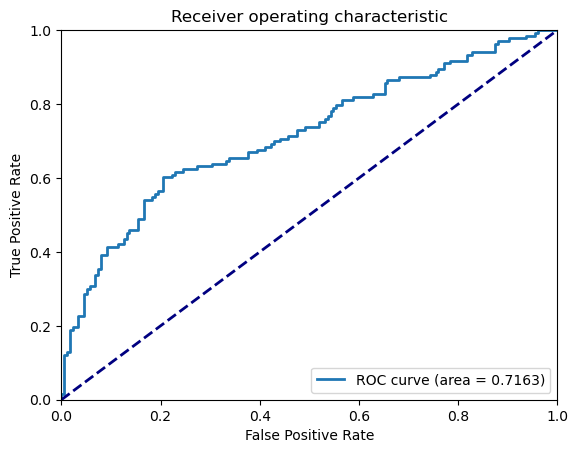

In [30]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('convnext',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Dense/best_model',metrics=metric,img_height=img_height,img_width=img_width,training=False)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
model.save("/home/jj/FYP/Saved_Model/ConvNext_CBISDDSM_DenseLayerTraining")

## Fine Tune

77/77 [==============================] - 9s 75ms/step


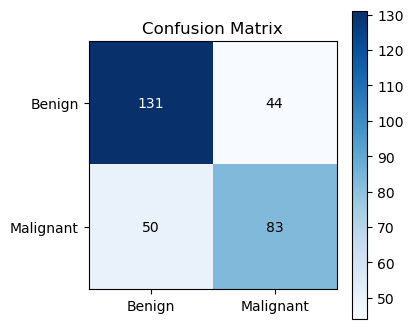

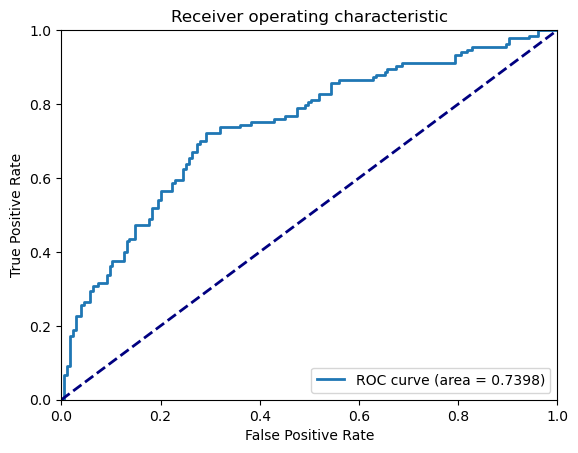

In [31]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('convnext',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Fine_Tune/best_model',metrics=metric,img_height=img_height,img_width=img_width)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
model.save("/home/jj/FYP/Saved_Model/ConvNext_CBISDDSM_2FT")

## FT2

77/77 [==============================] - 8s 77ms/step


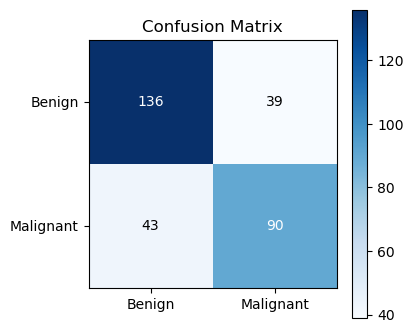

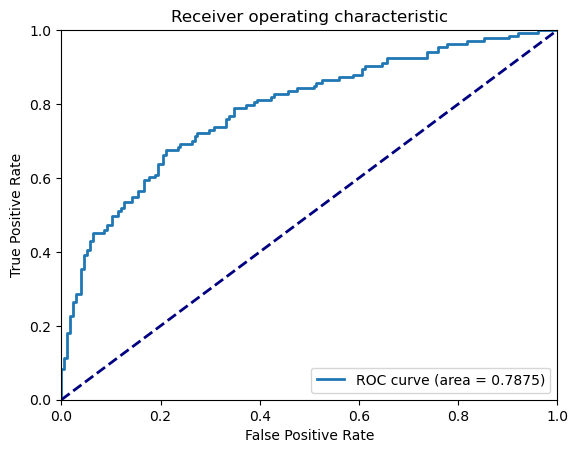

In [32]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('convnext',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Final_2/Final_2',metrics=metric,img_height=img_height,img_width=img_width,training=False)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
model.save("/home/jj/FYP/Saved_Model/ConvNext_CBISDDSM_FullFT")
tf.keras.backend.clear_session()

In [33]:
misclassified = Model_Training.store_misclassified(model,test,'/mnt/c/Users/user/Desktop/CBISDDSM_CONVNEXT_misclassified/')

77/77 [==============================] - 7s 76ms/step


# EfficientNet V2M

## Initialising

In [4]:
weights = '/home/jj/FYP/Checkpoint/Efficientnetv2m_CBIS_DDSM/'
train_log = '/home/jj/FYP/log/Efficientnetv2m_CBIS_DDSM/'

 3/77 [>.............................] - ETA: 3s - loss: 0.6131 - categorical_accuracy: 0.6667 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7951  

2023-04-06 17:29:44.739336: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.40GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-04-06 17:29:44.740109: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.40GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-04-06 17:29:44.780358: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.42GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-04-06 17:29:44.780410: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU

77/77 [==============================] - 5s 37ms/step


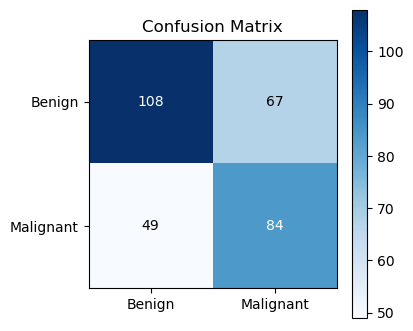

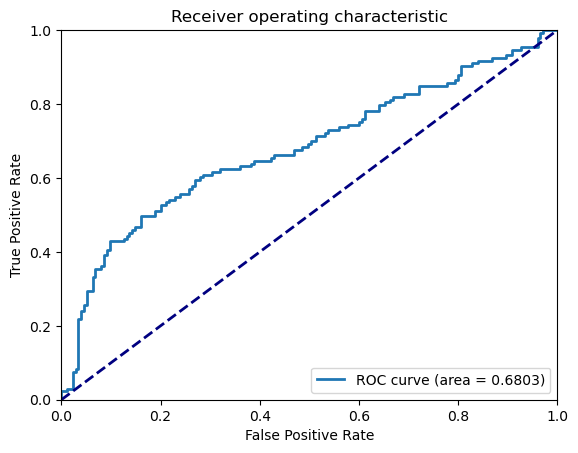

In [35]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('efficientnetv2m',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Dense/best_model',metrics=metric,img_height=img_height,img_width=img_width,training=False)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
model.save("/home/jj/FYP/Saved_Model/EfficientNetV2M_CBISDDSM_DenseLayerTraining")

## Fine Tuning

2023-04-06 17:30:05.232056: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetv2-m/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


77/77 [==============================] - 5s 28ms/step - loss: 0.6454 - categorical_accuracy: 0.6169 - precision: 0.5419 - recall: 0.7293 - auc: 0.6802


2023-04-06 17:30:10.103869: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/efficientnetv2-m/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


77/77 [==============================] - 4s 24ms/step


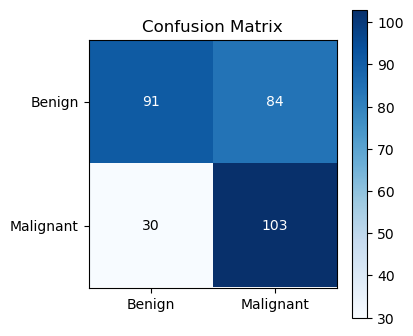

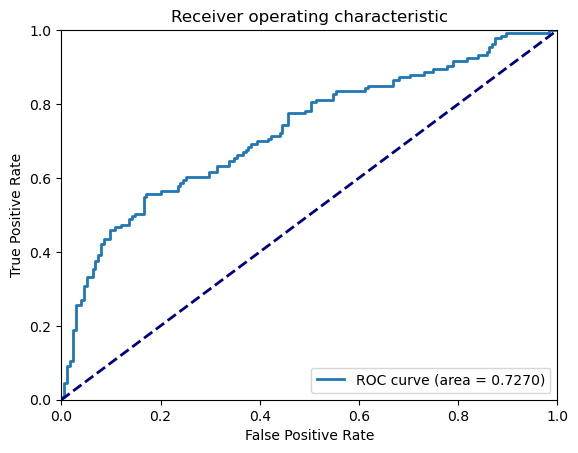

In [36]:
tf.keras.backend.clear_session()
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('efficientnetv2m',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Fine_Tune/best_model',metrics=metric,img_height=img_height,img_width=img_width)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
model.save("/home/jj/FYP/Saved_Model/EfficientNetV2M_CBISDDSM_2FT")

## FT2

2023-04-06 23:12:41.571952: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-04-06 23:12:47.121086: W tensorflow/tsl/framework/bfc_allocator.cc:360] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.


 3/77 [>.............................] - ETA: 3s - loss: 0.1130 - categorical_accuracy: 1.0000 - precision: 0.0000e+00 - recall_10: 0.0000e+00 - auc: 1.0000   

2023-04-06 23:12:47.407765: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


77/77 [==============================] - 6s 38ms/step


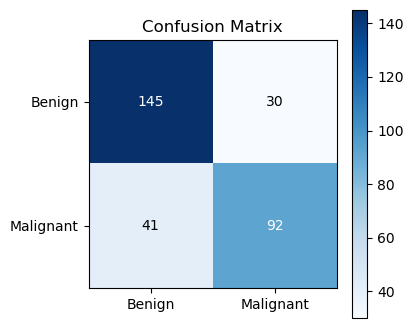

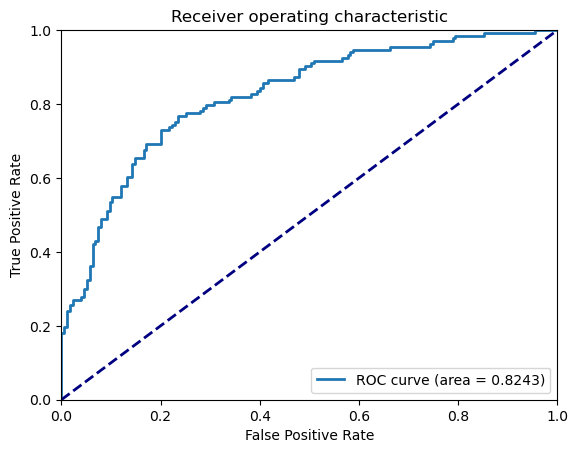

In [5]:
metric = [tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(class_id=1),tf.keras.metrics.Recall(class_id=1),
          tf.keras.metrics.AUC()]
model = Model_Training.build_model('efficientnetv2m',augmentation=False,flatten='global_average_pooling',load_weights=weights+'Final_2/Final_2',metrics=metric,img_height=img_height,img_width=img_width,training=False)
model.evaluate(test)
prediction = model.predict(test)
cm = Model_Training.confusion_matrix(test,prediction)
AUC = Model_Training.AUC(test,prediction)
model.save("/home/jj/FYP/Saved_Model/EfficientNetV2M_CBISDDSM_FullFT")
tf.keras.backend.clear_session()